<a href="https://colab.research.google.com/github/Shaiqab/python/blob/main/Capstone_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone project on Covid_19 prediction

1/2.As in todays digital world using data and making predictions about the future is helping people in every sector .we can see its impact on healthcare domain as well.Imagine being able to predict health issues before they become serious or optimize hospital resources by predicting patients necessity is one of the most important goal of analysis in healthcare.During covid outbreak we can somehow manage this by just predicting what are the common symptoms how people are getting effected what is the impact of covid on elderly people what basic precautions we have to take so on and so on  

3.In our project  I dont think of adding new features as the deatils are enough to predict a person has covid positive or not ..We can do this for any other prediction of disease as well by just taking the history that is the symptoms related to that particular disease

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#reading the dataframe
df=pd.read_csv("/content/CAP+Project+2+-+corona_tested_006.zip")

<ipython-input-2-13421b5b773f>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/CAP+Project+2+-+corona_tested_006.zip")


In [ ]:
#to check how the data looks
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
#to check the number of rows and columns
df.shape

(278848, 11)

In [ ]:
#to check the data type and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
#to check the duplicates
df[df.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


In [ ]:
#get the name of the columns
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
#as the ind_id and test date have not much effect so just droping
df.drop(columns=["Test_date","Ind_ID"],axis=1,inplace=True)

In [ ]:
#the colum only contains the true or false but there are some none values so replacing this by nan values
df["Cough_symptoms"]=df["Cough_symptoms"].replace("None",np.nan)

In [ ]:
#as we see true,false are written in different format so making all in one format that is in lower case
df["Cough_symptoms"]=df["Cough_symptoms"].apply(lambda x: x.lower() if isinstance(x,str) else x)
df["Cough_symptoms"]=df["Cough_symptoms"].apply(lambda x: "true" if x==True else x)
df["Cough_symptoms"]=df["Cough_symptoms"].apply(lambda x: "false" if x==False else x)

In [ ]:
#same for the fever
df["Fever"]=df["Fever"].replace("None",np.nan)
df["Fever"]=df["Fever"].apply(lambda x: x.lower() if isinstance(x,str) else x)
df["Fever"]=df["Fever"].apply(lambda x: "true" if x==True else x)
df["Fever"]=df["Fever"].apply(lambda x: "false" if x==False else x)

In [ ]:
# same for sore_throat
df["Sore_throat"]=df["Sore_throat"].replace("None",np.nan)
df["Sore_throat"]=df["Sore_throat"].apply(lambda x: x.lower() if isinstance(x,str) else x)
df["Sore_throat"]=df["Sore_throat"].apply(lambda x: "true" if x==True else x)
df["Sore_throat"]=df["Sore_throat"].apply(lambda x: "false" if x==False else x)

In [ ]:
#same for shortness_of_breath
df["Shortness_of_breath"]=df["Shortness_of_breath"].replace("None",np.nan)
df["Shortness_of_breath"]=df["Shortness_of_breath"].apply(lambda x: x.lower() if isinstance(x,str) else x)
df["Shortness_of_breath"]=df["Shortness_of_breath"].apply(lambda x: "true" if x==True else x)
df["Shortness_of_breath"]=df["Shortness_of_breath"].apply(lambda x: "false" if x==False else x)

In [ ]:
#and headache as well
df["Headache"]=df["Headache"].replace("None",np.nan)
df["Headache"]=df["Headache"].apply(lambda x: x.lower() if isinstance(x,str) else x)
df["Headache"]=df["Headache"].apply(lambda x: "true" if x==True else x)
df["Headache"]=df["Headache"].apply(lambda x: "false" if x==False else x)

In [ ]:
#Corona has more than two class so it will become multi logistic regression model so just replacing other with negative to make it binary logistic Regression model
df["Corona"]=df["Corona"].replace("other","negative")

In [ ]:
#other than yes no it also has None values,replacing that with no as it is the most frequent in the dataset
df["Age_60_above"]=df["Age_60_above"].replace("None","No")

In [ ]:
#replacing none values with nan
df["Sex"]=df["Sex"].replace("None",np.nan)

In [ ]:
#to know the count of null values
df.isnull().sum()

Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                     0
Age_60_above               0
Sex                    19563
Known_contact              0
dtype: int64

In [ ]:
#filling the missing values with mode as the datatype of the features is object
df["Cough_symptoms"].fillna(df["Cough_symptoms"].mode()[0],inplace=True)

In [ ]:
df["Fever"].fillna(df["Fever"].mode()[0],inplace=True)
df["Sore_throat"].fillna(df["Sore_throat"].mode()[0],inplace=True)
df["Shortness_of_breath"].fillna(df["Shortness_of_breath"].mode()[0],inplace=True)
df["Headache"].fillna(df["Headache"].mode()[0],inplace=True)
df["Sex"].fillna(df["Sex"].mode()[0],inplace=True)

In [ ]:
#checking sum after filling the missing values
df.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
# again checking the shape
df.shape

(278848, 9)

In [ ]:
#to check the different values and the count
for i in df:
  print(df[i].value_counts())
  print("            ")

false    236620
true      42228
Name: Cough_symptoms, dtype: int64
            
false    257096
true      21752
Name: Fever, dtype: int64
            
false    276922
true       1926
Name: Sore_throat, dtype: int64
            
false    277271
true       1577
Name: Shortness_of_breath, dtype: int64
            
false    276434
true       2414
Name: Headache, dtype: int64
            
negative    264119
positive     14729
Name: Corona, dtype: int64
            
No     253023
Yes     25825
Name: Age_60_above, dtype: int64
            
female    149721
male      129127
Name: Sex, dtype: int64
            
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64
            


In [ ]:
#df=df.to_csv("corona_data.csv")   # to save the clean data

#EDA

categorical- barplot, countplot,pie
numerical - histogram, boxplot,distplot
cat-cat= cross tab with heatmap
cat-numerical= barplot, boxplot,violinplot and catplot


#univariate analsis

<Axes: xlabel='Cough_symptoms', ylabel='count'>

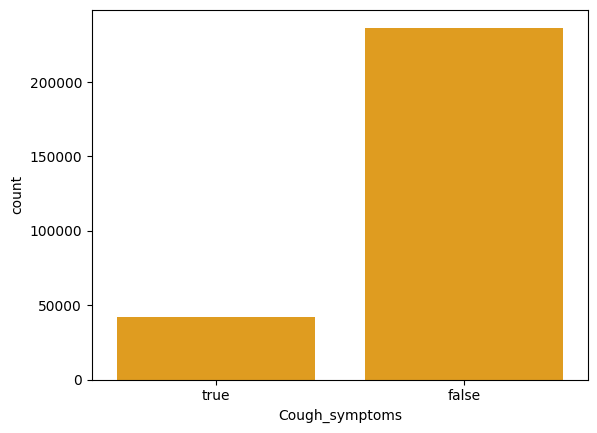

In [ ]:
sns.countplot(x=df['Cough_symptoms'],color="orange")

in above count plot we see in our dataset people who are not facing cough_symptoms are larger than the people facing cough_symptoms

<Axes: xlabel='Age_60_above', ylabel='count'>

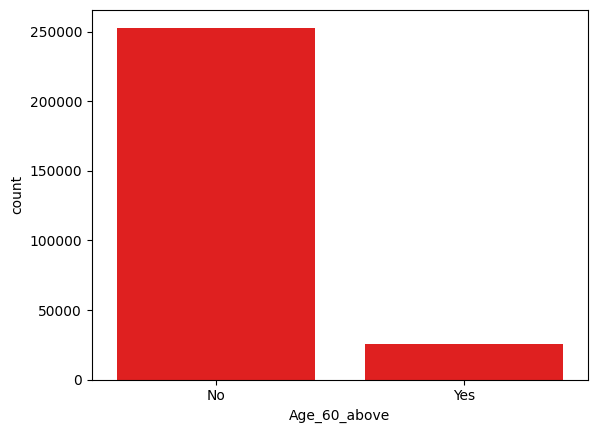

In [ ]:
sns.countplot(x=df['Age_60_above'],color="red")

In our dataset there is a feature Age_above_60 years in which we have some elderly peoples as well

<Axes: xlabel='Shortness_of_breath', ylabel='count'>

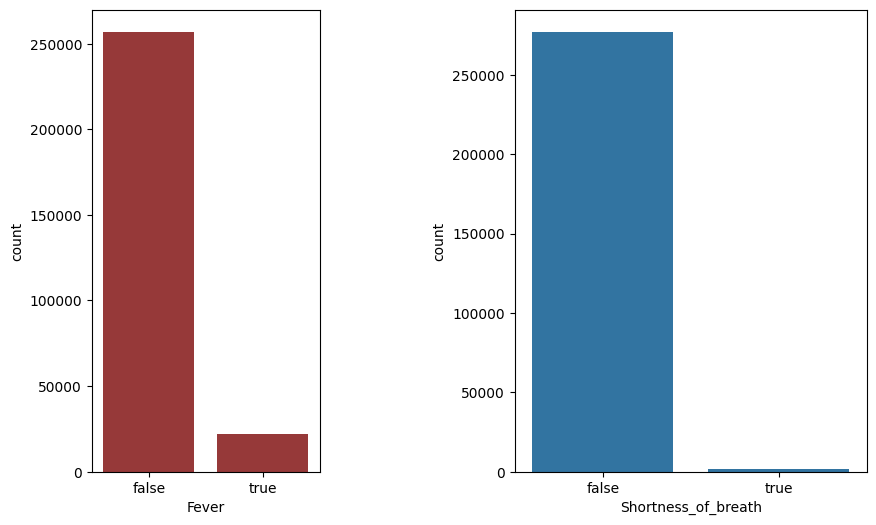

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.countplot(x=df["Fever"],color="brown")
plt.subplot(1,2,2)
sns.countplot(x=df["Shortness_of_breath"])


to check the count of peoples who are facing any symptom or not

<Axes: xlabel='Corona', ylabel='count'>

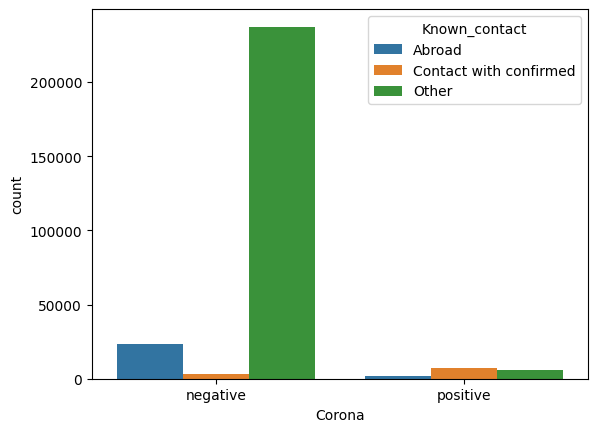

In [ ]:
sns.countplot(x=df["Corona"],hue=df["Known_contact"])

to check how the corona is spreading ..we see that the people who are getting corona positive is by contact with other patients and the person who are in contact with the patients but not effected are very less. Most of the corona positive cases is because of the contact with other corona positive

<Axes: xlabel='Corona', ylabel='count'>

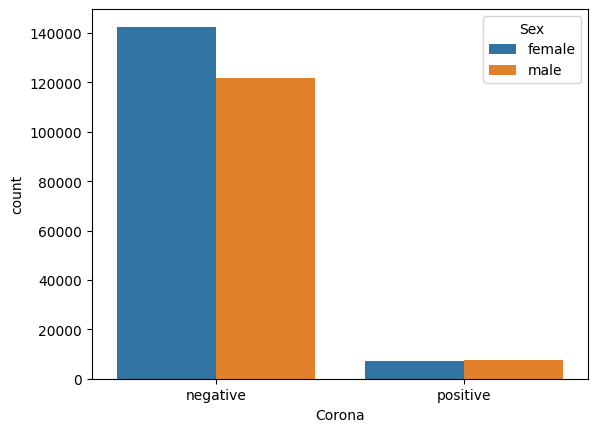

In [ ]:
sns.countplot(x=df["Corona"],hue=df["Sex"])

we see that count of person who are corona positive has equal male and female

<Axes: ylabel='Known_contact'>

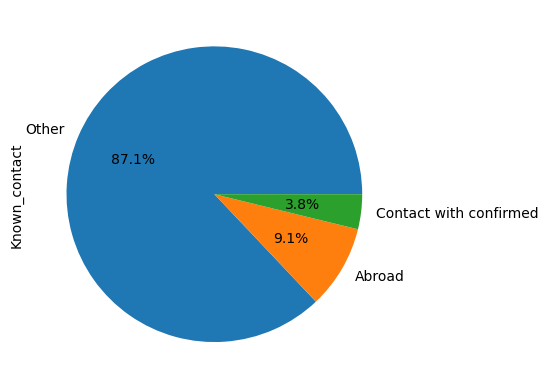

In [ ]:
df["Known_contact"].value_counts().plot(kind="pie",autopct="%1.1f%%")

in our dataset there are people whose known_contact is other,some have abroad and few has contact with confirmed

<Axes: ylabel='Age_60_above'>

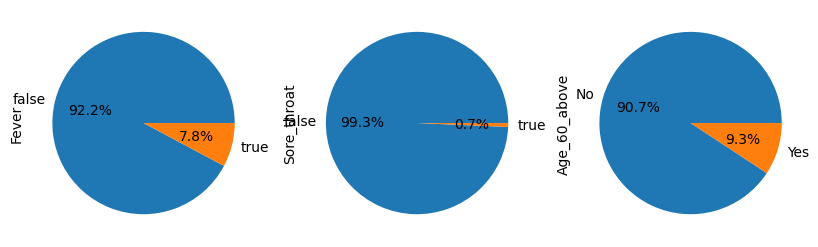

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
df["Fever"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.subplot(1,3,2)
df["Sore_throat"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.subplot(1,3,3)
df["Age_60_above"].value_counts().plot(kind="pie",autopct="%1.1f%%")

just to check the percentage of true and false regarding different symptoms

In [ ]:
#to compare two categorical variable
pd.crosstab(df["Corona"],df["Cough_symptoms"])

Cough_symptoms,false,true
Corona,,
negative,228475,35644
positive,8145,6584


there are peoples who are facing the cough_symptoms but they are corona negative and there are peoples who are facing cough symptoms and corona positive as well

In [ ]:
pd.crosstab(df["Corona"],df["Fever"])

Fever,false,true
Corona,,
negative,247926,16193
positive,9170,5559


same comparison for corona and fever

#Chi2 test

to check the relation between two categorical variable we have chi2 test

1.first assumption-Null hypothesis:we dont have any relation between corona and headache

2.null hypothesis:we dont have any relation between corona and sex

3.null hypothesis:we dont have strong relation between corona and age_above_60

4.null hypothesis;we dont have any relation between corona and cough_symptoms

level of significance=0.05

In [ ]:
corona=df.copy() #for comparison taken a copy of df

In [ ]:
from sklearn.preprocessing import LabelEncoder #converting categorical variable into numeric
for col in corona.columns:
  le=LabelEncoder()
  corona[col]=le.fit_transform(corona[col])

In [ ]:
corona.head(5) #to look on the data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.feature_selection import chi2
independent=corona.drop(columns=["Corona"],axis=1) #droping the target variable
target=corona["Corona"] #target variable

In [ ]:
chi_score=chi2(independent,target)

In [ ]:
chi_score #chi2 value and p_value

(array([ 8970.87144981, 17870.96552629, 21051.77305705, 14802.73414955,
        36775.28882368,   545.98094076,    75.50044027,  2453.34929941]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 9.42550422e-121, 3.65325418e-018, 0.00000000e+000]))

In [ ]:
chi_values=pd.Series(chi_score[0],index=independent.columns)
chi_values.sort_values(ascending=False,inplace=True)

<Axes: >

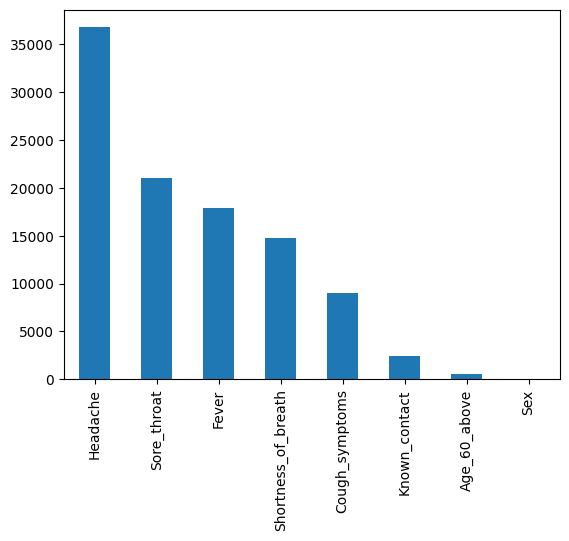

In [ ]:
chi_values.plot.bar() # plot a graph for chi_values

the greater the value of chi2 the more important the feature is

from above we can conclude that Headache is one of the most important feature and sex is one of the least important feature while predicting corona positive or negative

In [ ]:
p_values=pd.Series(chi_score[1],index=independent.columns) #p_values

In [ ]:
p_values

Cough_symptoms          0.000000e+00
Fever                   0.000000e+00
Sore_throat             0.000000e+00
Shortness_of_breath     0.000000e+00
Headache                0.000000e+00
Age_60_above           9.425504e-121
Sex                     3.653254e-18
Known_contact           0.000000e+00
dtype: float64

If p<0.05 we reject the null hypothesis
If p>0.05 there is no evidence to reject the null hypothesis

#conclusion

1.in our first assumption since the value of p<0.05 so we reject the null hypothesis and concluded that we have relation between corona and headache

2.In our 2nd assumption the value of p>0.05 so we accept the null hypothesis and concluded that there is not any relation between  corona and sex

3.in our 3rd assumption the value of p>0.05 so we accept the null hypothesis and concluded there is not any strong relation between corona and age_above_60

4.In our 3rd assumption the value of p<0.05 so we reject the null hypothesis and thus concluded there is a relation between corona and cough_symptom

#Machine Learning

In [ ]:
#encoding..as the features are nominal so doing by get_dummies
df=pd.get_dummies(df,columns=["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache","Age_60_above","Sex","Known_contact"],drop_first=True)

In [ ]:
X=df.drop(columns="Corona",axis=1) #drop target variable

In [ ]:
y=df["Corona"] #target variable

In [ ]:
d={"positive":1,"negative":0} #map the target variable
y=y.map(d)

In [ ]:
from sklearn.model_selection import train_test_split #spliting the data for train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
y_train

72894     0
109499    1
95257     0
83336     0
82973     0
         ..
211543    0
86293     0
122579    1
152315    0
117952    0
Name: Corona, Length: 223078, dtype: int64

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(X_train,y_train) #train the model

LogisticRegression()

In [ ]:
y_pred=log_r.predict(X_test) #predict the values

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score
print(accuracy_score(y_test,y_pred))#to check the performance of the model
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))   # as the target variable is not balanced so just checking with the other values

0.9628653397884167
0.7393842887473461
0.4685502859064918


#Kfold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(10)
cross_val=cross_val_score(log_r,X,y,cv=kfold,scoring="precision") #check with different scores
print(cross_val)
print(np.mean(cross_val))

[0.72590199 0.7320021  0.85425101 0.7392013  0.53806525 0.66512346
 0.7075     0.73520249 0.75547445 0.74585635]
0.7198578420414734


#StratifiedKfold

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)
result=cross_val_score(log_r,X,y,cv=skf,scoring="precision")

In [ ]:
print(result)
print(np.mean(result))

[0.6056338  0.62418726 0.77914692 0.65795542 0.51657625 0.76477024
 0.85910224 0.87735849 0.89273927 0.91518738]
0.7492657274395548


#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1=dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9665590819436973
0.5354860410359906
0.766859344894027


#Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(5)
val=cross_val_score(dt,X,y,cv=kfold)
print(val)
print(np.mean(val))

[0.94920208 0.9577192  0.95389995 0.98140544 0.98651581]
0.965748495324535


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(5)
val1=cross_val_score(dt,X,y,cv=skfold)
print(val1)
print(np.mean(val1))

[0.95884884 0.97073696 0.95866954 0.96888953 0.96820814]
0.9650706010316327


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2=rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9665770127308588
0.5358224016145308
0.7669715936446798


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(5)
val2=cross_val_score(rf,X,y,cv=skfold)
print(val2)
print(np.mean(val2))

[0.95849023 0.97082661 0.95892057 0.96899711 0.96820814]
0.9650885322046168


#XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred3=xg.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9665770127308588
0.5358224016145308
0.7669715936446798


cross validation to check with the different different folds

In [ ]:
from sklearn.model_selection import cross_val_score
val3=cross_val_score(xg,X,y,scoring="recall",cv=5)

In [ ]:
val3

array([0.64494229, 0.6269518 , 0.6269518 , 0.48013582, 0.4389002 ])

In [ ]:
print(np.mean(val3))

0.5635763839662885


In [ ]:
#creating a dataframe
data=pd.DataFrame({"Model":["Logistic reg","Decision tree","Random Forest","XGboost"],"Accuracy":[0.9628,0.9665,0.9666,0.9665],
                   "Recall":[0.4685,0.5354,0.5381,0.5358],"Precision":[0.7393,0.7668,0.7662,0.7669]})

In [ ]:
data

,Model,Accuracy,Recall,Precision
0,Logistic reg,0.9628,0.4685,0.7393
1,Decision tree,0.9665,0.5354,0.7668
2,Random Forest,0.9666,0.5381,0.7662
3,XGboost,0.9665,0.5358,0.7669


#Comparing the models

<Axes: xlabel='Model', ylabel='Accuracy'>

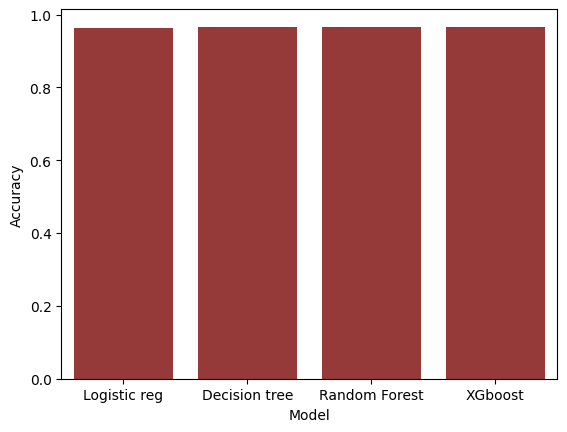

In [ ]:
sns.barplot(x=data["Model"],y=data["Accuracy"],color="brown")

<Axes: xlabel='Model', ylabel='Precision'>

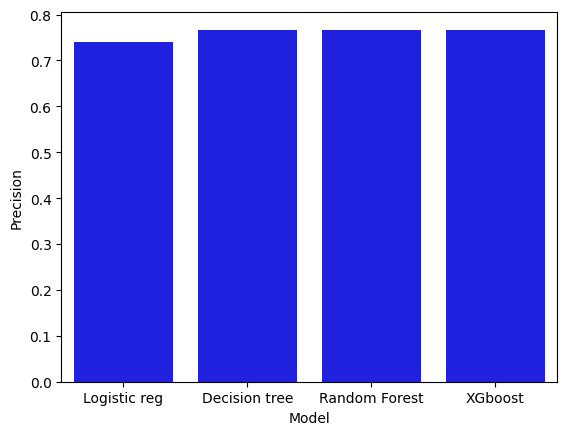

In [ ]:
sns.barplot(x=data["Model"],y=data["Precision"],color="blue")

<Axes: xlabel='Model', ylabel='Recall'>

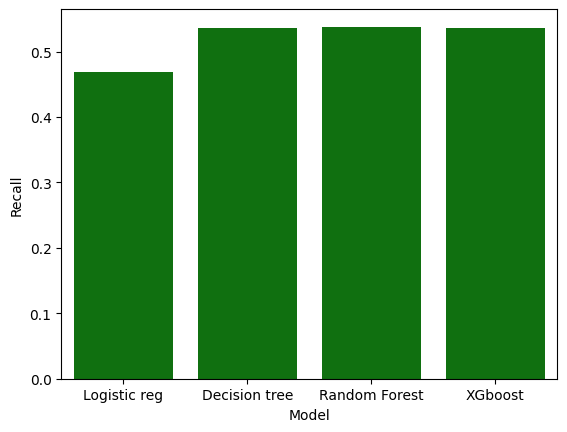

In [ ]:
sns.barplot(x=data["Model"],y=data["Recall"],color="green")

As all the models are performing equally but recall and precision score for logistic regression is less in comparison to other models